In [1]:
import tensorflow

In [2]:
import keras

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('UNSW_NB15_training-setmulticlass.csv')

In [5]:
df = df.sample(n=80000, replace=True)

In [6]:
dfCount=df.attack_cat.value_counts()

In [7]:
dfCount

Normal            35821
Generic           18235
Exploits          11128
Fuzzers            5915
DoS                3904
Reconnaissance     3388
Analysis            654
Backdoor            566
Shellcode           352
Worms                37
Name: attack_cat, dtype: int64

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
# check for cardinality in categorical variables
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

There are 4 categorical variables

The categorical variables are : ['proto', 'service', 'state', 'attack_cat']
proto  contains  131  labels
service  contains  13  labels
state  contains  6  labels
attack_cat  contains  10  labels


In [9]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')
df['attack_cat'] = df['attack_cat'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [11]:
X = df.iloc[:, :-2]
Y=df['attack_cat']

In [12]:
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
3266,3267,0.000008,93,0,3,2,0,200,0,1.250000e+05,...,1,1,1,4,0,0,0,3,4,0
14452,14453,0.000004,117,2,3,2,0,114,0,2.500000e+05,...,25,25,25,43,0,0,0,25,43,0
29786,29787,3.988839,111,5,2,358,746,19098,1087890,2.765216e+02,...,5,1,1,1,0,0,0,2,3,0
34174,34175,0.097117,117,0,1,4,4,512,304,7.207801e+01,...,3,1,1,1,0,0,0,5,12,0
75641,75642,0.000008,117,0,3,2,0,172,0,1.250000e+05,...,1,1,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,29234,0.001094,117,2,1,2,2,146,178,2.742230e+03,...,4,1,1,2,0,0,0,4,2,0
43772,43773,0.000002,117,0,3,2,0,2634,0,5.000000e+05,...,1,1,1,1,0,0,0,2,2,0
44893,44894,2.086557,111,7,2,16,16,832,944,1.485701e+01,...,2,1,1,1,0,0,0,1,1,0
34343,34344,1.055163,111,5,2,14,18,1684,10168,2.937935e+01,...,3,1,1,1,0,0,1,1,1,0


In [13]:
Y

3266     3
14452    5
29786    6
34174    6
75641    6
        ..
29233    6
43772    2
44893    3
34343    6
7291     3
Name: attack_cat, Length: 80000, dtype: int8

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Fit the model to your data
extra_trees.fit(X, Y)

# Print feature importances
feature_importances = extra_trees.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
id: 0.20784281680160632
dur: 0.009669459533507351
proto: 0.017154422134950408
service: 0.07578182935901027
state: 0.029311620482347592
spkts: 0.006304433939260404
dpkts: 0.0059086802583220785
sbytes: 0.027800991761576264
dbytes: 0.008215244494919928
rate: 0.021892772900033712
sttl: 0.06131747126107953
dttl: 0.030776923001288994
sload: 0.014337399604415138
dload: 0.014545002002005302
sloss: 0.006023034249017009
dloss: 0.005807977806074722
sinpkt: 0.011439512712509968
dinpkt: 0.006200099503876464
sjit: 0.00678631714772518
djit: 0.005286523027470388
swin: 0.0376299336557828
stcpb: 0.009196911064860324
dtcpb: 0.009476323909740025
dwin: 0.019389590508405143
tcprtt: 0.008824441492556076
synack: 0.008194693587970361
ackdat: 0.006791256622078985
smean: 0.03117394038385064
dmean: 0.01463892399133232
trans_depth: 0.004517920364997264
response_body_len: 0.0015126937110484838
ct_srv_src: 0.030954683149570332
ct_state_ttl: 0.03598717258674762
ct_dst_ltm: 0.015706416909973604
ct

In [15]:
# Print feature importances in sorted order
feature_importances = extra_trees.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

print("Feature Importances (Sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

Feature Importances (Sorted):
id: 0.20784281680160632
service: 0.07578182935901027
sttl: 0.06131747126107953
ct_dst_src_ltm: 0.05082209810740921
ct_dst_sport_ltm: 0.046354234542040414
ct_srv_dst: 0.045687361240879285
swin: 0.0376299336557828
ct_state_ttl: 0.03598717258674762
smean: 0.03117394038385064
ct_srv_src: 0.030954683149570332
dttl: 0.030776923001288994
ct_src_dport_ltm: 0.030578075711513497
state: 0.029311620482347592
sbytes: 0.027800991761576264
rate: 0.021892772900033712
dwin: 0.019389590508405143
proto: 0.017154422134950408
ct_dst_ltm: 0.015706416909973604
dmean: 0.01463892399133232
dload: 0.014545002002005302
sload: 0.014337399604415138
ct_src_ltm: 0.01266325614098826
sinpkt: 0.011439512712509968
dur: 0.009669459533507351
dtcpb: 0.009476323909740025
stcpb: 0.009196911064860324
tcprtt: 0.008824441492556076
dbytes: 0.008215244494919928
synack: 0.008194693587970361
ackdat: 0.006791256622078985
sjit: 0.00678631714772518
spkts: 0.006304433939260404
dinpkt: 0.006200099503876464
s

In [16]:
# Define importance threshold
threshold = 0.021

# Print selected features with importance >= threshold
print("Selected Features with Importance >= 0.021:")
for feature, importance in zip(X.columns, extra_trees.feature_importances_):
    if importance >= threshold:
        print(f"{feature}: {importance}")

Selected Features with Importance >= 0.021:
id: 0.20784281680160632
service: 0.07578182935901027
state: 0.029311620482347592
sbytes: 0.027800991761576264
rate: 0.021892772900033712
sttl: 0.06131747126107953
dttl: 0.030776923001288994
swin: 0.0376299336557828
smean: 0.03117394038385064
ct_srv_src: 0.030954683149570332
ct_state_ttl: 0.03598717258674762
ct_src_dport_ltm: 0.030578075711513497
ct_dst_sport_ltm: 0.046354234542040414
ct_dst_src_ltm: 0.05082209810740921
ct_srv_dst: 0.045687361240879285


In [17]:
threshold = 0.021

# Select features with importance >= threshold
selected_features = []
for index, importance in enumerate(extra_trees.feature_importances_):
    if importance >= threshold:
        selected_features.append(X.columns[index])

# Filter X based on selected features
X = X[selected_features]

# Now you can use X_selected for further processing
print("Selected Features:", selected_features)
print("Shape of X_selected:", X.shape)

Selected Features: ['id', 'service', 'state', 'sbytes', 'rate', 'sttl', 'dttl', 'swin', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Shape of X_selected: (80000, 15)


In [18]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
df_rescaled = pd.DataFrame(data=rescaleX)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaleX,Y, test_size=0.3, random_state=10)

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

In [24]:
#Model 1 for all features
#Initialising the Artificial Neural Network
model = Sequential()
#Creating the Input-layer and the first hidden layer
model.add(Dense(400, input_dim=15, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
#Creating the output  layer
model.add(Dense(10, activation='softmax'))
#Compiling the ANN classifier
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelhistory=model.fit(X_train, y_train,validation_split=0.33, batch_size=50, epochs=100)

Epoch 1/100
751/751 [==============================] - 31s 34ms/step - loss: 0.4980 - accuracy: 0.8229 - val_loss: 0.4062 - val_accuracy: 0.8484
Epoch 2/100
751/751 [==============================] - 23s 30ms/step - loss: 0.3840 - accuracy: 0.8598 - val_loss: 0.3700 - val_accuracy: 0.8623
Epoch 3/100
751/751 [==============================] - 21s 28ms/step - loss: 0.3588 - accuracy: 0.8663 - val_loss: 0.3542 - val_accuracy: 0.8653
Epoch 4/100
751/751 [==============================] - 21s 28ms/step - loss: 0.3459 - accuracy: 0.8707 - val_loss: 0.3688 - val_accuracy: 0.8646
Epoch 5/100
751/751 [==============================] - 21s 28ms/step - loss: 0.3315 - accuracy: 0.8738 - val_loss: 0.3288 - val_accuracy: 0.8759
Epoch 6/100
751/751 [==============================] - 22s 29ms/step - loss: 0.3217 - accuracy: 0.8771 - val_loss: 0.3146 - val_accuracy: 0.8784
Epoch 7/100
751/751 [==============================] - 22s 29ms/step - loss: 0.3139 - accuracy: 0.8790 - val_loss: 0.3066 - val_ac

from keras.models import Sequential

In [25]:
y_test

12797    5
52378    3
56975    3
8084     2
37701    6
        ..
48094    4
14234    5
13169    5
13965    5
22162    5
Name: attack_cat, Length: 24000, dtype: int8

In [26]:
y_testCat = to_categorical(y_test)
y_pred = model.predict(X_test)
model.evaluate(X_test,y_testCat)

750/750 [==============================] - 14s 16ms/step - loss: 0.3799 - accuracy: 0.8936


[0.37992778420448303, 0.893583357334137]

In [27]:
for p in predictions:
    print (p)

NameError: name 'predictions' is not defined

In [208]:
XTr=pd.DataFrame(predictions)
XTr.to_csv("D://faranResearch/M4/M4-prediction.csv")

In [28]:
pr=[]
for p in y_pred:
    mval= max(list(p))
    mindx=list(p).index(mval)
    pr.append(mindx)

In [29]:
pr

[5,
 3,
 3,
 2,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 3,
 3,
 6,
 5,
 6,
 3,
 5,
 6,
 6,
 2,
 6,
 6,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 6,
 3,
 6,
 2,
 6,
 2,
 3,
 7,
 5,
 5,
 4,
 6,
 3,
 6,
 7,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 2,
 4,
 6,
 2,
 5,
 5,
 6,
 5,
 6,
 3,
 6,
 6,
 6,
 7,
 6,
 2,
 6,
 6,
 4,
 3,
 6,
 6,
 6,
 6,
 7,
 6,
 3,
 4,
 6,
 5,
 6,
 4,
 6,
 6,
 7,
 6,
 5,
 3,
 6,
 6,
 5,
 3,
 6,
 3,
 6,
 6,
 6,
 6,
 5,
 6,
 4,
 4,
 3,
 3,
 6,
 4,
 6,
 6,
 2,
 4,
 5,
 4,
 2,
 3,
 5,
 5,
 5,
 6,
 5,
 2,
 5,
 5,
 3,
 6,
 2,
 3,
 7,
 6,
 6,
 6,
 5,
 3,
 6,
 5,
 5,
 6,
 3,
 6,
 7,
 5,
 4,
 5,
 5,
 5,
 2,
 6,
 7,
 6,
 5,
 6,
 4,
 6,
 3,
 4,
 7,
 6,
 5,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 3,
 6,
 5,
 3,
 6,
 2,
 6,
 5,
 7,
 7,
 4,
 2,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 3,
 4,
 5,
 3,
 5,
 6,
 6,
 3,
 6,
 5,
 6,
 6,
 5,
 3,
 7,
 6,
 3,
 5,
 3,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 6,
 3,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 2,
 1,
 6,
 4,
 2,
 5,
 3,
 3,
 6,
 5,
 6,
 3,
 7,
 6,
 6,
 6,
 6,
 6,


In [205]:
print(pr)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.48      0.06      0.11       209
           1       0.30      0.11      0.16       178
           2       0.44      0.43      0.43      1150
           3       0.71      0.76      0.74      3414
           4       0.72      0.83      0.77      1768
           5       0.99      0.97      0.98      5480
           6       1.00      1.00      1.00     10713
           7       0.86      0.79      0.82       973
           8       0.56      0.55      0.55       104
           9       0.50      0.55      0.52        11

    accuracy                           0.89     24000
   macro avg       0.66      0.60      0.61     24000
weighted avg       0.89      0.89      0.89     24000



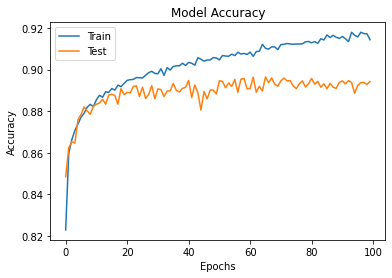

In [31]:
import matplotlib.pyplot as plt
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Accuracy-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

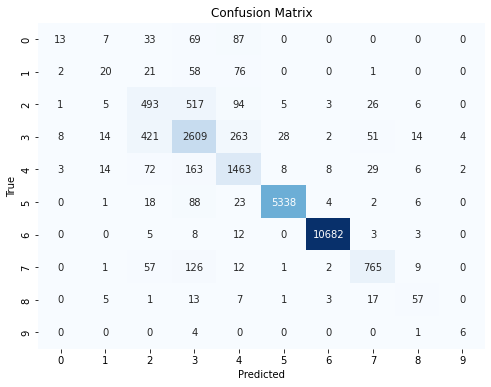

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pr)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

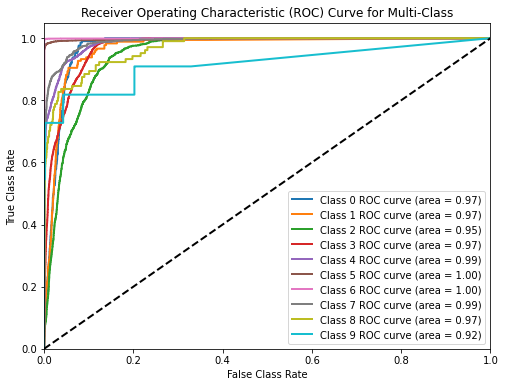

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Class Rate')
plt.ylabel('True Class Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()